# Лабораторна робота 2

## Використання Pandas для аналізу даних

### Мета роботи: Вивчення основних функцій Pandas для аналізу даних.

#### _Виконав студент групи КН-221а Чередниченко Максим_

In [2]:
n = 30
N = (n + 4 ) % 5 + 1
print(N)

5


### Варіант 5.
Вправи: 2, 4, 6, 7, 9, 10, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27

In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv(r'.\NationalNames.csv')

In [4]:
# 2
df.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


In [5]:
# 4
df.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


In [6]:
# 6
pd.DataFrame(df.groupby('Gender')['Name'].nunique())



,Name
Gender,
F,64911
M,39199


In [7]:
# 7
df[(df['Year'] == 2010) & (df['Gender'] == 'M')].sort_values(by='Count', ascending=False).head(5)


,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


In [8]:
# 9
df[df['Count'] == df['Count'].min()].shape[0]


254615

In [9]:
# 10 Підрахуйте кількість унікальних імен у кожному році
pd.DataFrame(df.groupby('Year')['Name'].nunique())


,Name
Year,
1880,1889
1881,1830
1882,2012
1883,1962
1884,2158
...,...
2010,31603
2011,31418
2012,31236


In [10]:
# 15 Знайдіть загальну кількість народжень за рік.
pd.DataFrame(df.groupby('Year')['Count'].sum())

,Count
Year,
1880,201484
1881,192699
1882,221538
1883,216950
1884,243467
...,...
2010,3686589
2011,3646730
2012,3643336


In [11]:
# 16 Знайдіть рік, коли народилося найбільше дітей
pd.DataFrame(df.groupby('Year')['Count'].sum()).sort_values(by='Count', ascending=False).iloc[0].name

1957

In [12]:
#17 Знайдіть кількість дівчаток та хлопчиків, які народились кожного року
df.groupby(['Year', 'Gender'])['Count'].sum().unstack()


Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
...,...,...
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414


In [13]:
# 18 Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків.
df_gender = df.groupby(['Year', 'Gender'])['Count'].agg('sum').unstack()
num_years = (df_gender['F'] > df_gender['M']).sum()
print(num_years)


54


In [14]:
# 20 Підрахуйте кількість гендерно нейтральних імен (однакових для дівчат та хлопців)
gender_counts = df.groupby('Name')['Gender'].nunique()
# print(gender_counts)
(gender_counts == 2).sum()


10221

In [15]:
# 21 Порахуйте, скільки разів хлопчиків називали Barbara
df[(df['Gender'] == 'M') & (df['Name'] == 'Barbara')]['Count'].sum()


4139

In [16]:
# 22 Підрахуйте скільки років проводилось спостереження
df['Year'].nunique()

135

In [17]:
# 23 Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року)

name_counts_by_year = df.groupby(['Name', 'Year', 'Gender'])['Name'].count().unstack().reset_index()
name_counts_by_year = name_counts_by_year[(name_counts_by_year['F'] > 0) & (name_counts_by_year['M'] > 0)]

pd.DataFrame(name_counts_by_year.groupby('Name')['Year'].count()[name_counts_by_year.groupby('Name')['Year'].count() == df['Year'].nunique()].reset_index()['Name'])


,Name
0,Francis
1,James
2,Jean
3,Jesse
4,Jessie
5,John
6,Johnnie
7,Joseph
8,Lee
9,Leslie


In [18]:
# 24 Знайти найпопулярніше серед непопулярних імен (непопулярне ім’я, яким називали дітей найбільшу кількість разів )
# get the count of each name
name_counts = df.groupby('Name')['Count'].sum()

# get the names that are not very popular
unpopular_names = name_counts[name_counts < 200].index

# get the count of each unpopular name
unpopular_name_counts = df[df['Name'].isin(unpopular_names)].groupby('Name')['Count'].sum()

# get the most popular unpopular name
most_popular_unpopular_name = unpopular_name_counts.idxmax()

print(most_popular_unpopular_name)


Albertia


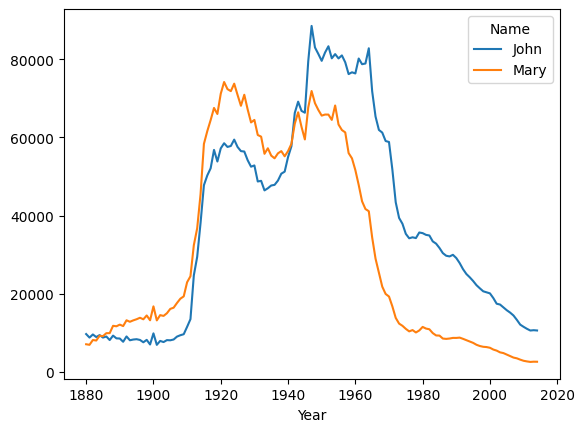

In [19]:
# 25 Побудувати графіки розподілення кількості імен John та Mary по роках без залежності до статі.
import matplotlib.pyplot as plt

# filter the data for John and Mary names
john_mary_df = df[df['Name'].isin(['John', 'Mary'])]

# group the data by year and name
grouped_df = john_mary_df.groupby(['Year', 'Name'])['Count'].sum().unstack()

# plot the data
grouped_df.plot(kind='line')
plt.xlabel('Year')
plt.show()


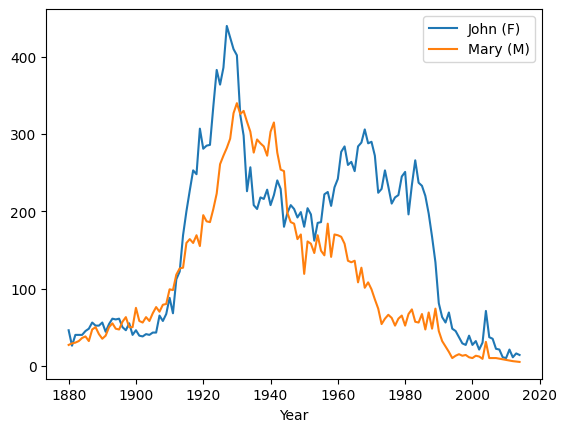

In [20]:
# 26 Побудувати графіки розподілення кількості жіночих імен John та чоловічих імен Mary по роках.
import matplotlib.pyplot as plt

john_df = df[(df['Name'] == 'John') & (df['Gender'] == 'F')]
mary_df = df[(df['Name'] == 'Mary') & (df['Gender'] == 'M')]

john_grouped_df = john_df.groupby('Year')['Count'].sum()
mary_grouped_df = mary_df.groupby('Year')['Count'].sum()

plt.plot(john_grouped_df.index, john_grouped_df.values, label='John (F)')
plt.plot(mary_grouped_df.index, mary_grouped_df.values, label='Mary (M)')
plt.legend()
plt.xlabel('Year')
plt.show()


In [21]:
# 27 Знайти найпопулярніші імена в кожному році.
most_popular_names_by_year = df.groupby(['Year', 'Name'])['Count'].sum().reset_index()
most_popular_names_by_year = most_popular_names_by_year.loc[most_popular_names_by_year.groupby('Year')['Count'].idxmax()]
most_popular_names_by_year = most_popular_names_by_year[['Year', 'Name', 'Count']].set_index('Year')
most_popular_names_by_year

,Name,Count
Year,,
1880,John,9701
1881,John,8795
1882,John,9597
1883,John,8934
1884,John,9428
...,...,...
2010,Isabella,22913
2011,Sophia,21839
2012,Sophia,22285
